# Sample Dataset
## Training Dataset

In [2]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
        'n_topping': [2, 1, 0, 2, 0],
        'harga': [7, 9 , 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


## Testing Dataset

In [3]:
pizza = {'diameter': [8, 9, 11, 16, 12],
        'n_topping': [2, 0, 2, 2, 0],
        'harga': [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


# Preprocessing Dataset

In [4]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train: {X_train}')
print(f'y_train: {y_train}')

X_train: [[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]
y_train: [ 7.   9.  13.  17.5 18. ]


In [5]:
X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test: {X_test}')
print(f'y_test: {y_test}')

X_test: [[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]
y_test: [11.   8.5 15.  18.  11. ]


# Multiple Linear Regression
Multiple Linear Regression merupakan generalisasi dari simple linear regression yang memungkinkan untuk menggunakan independent variable/features lebih dari 1

tidak ada perbedaan aplikasi di sklearn terhadap multiple regression dengan simple regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'r_squared: {r2}')

r_squared: 0.7701677731318468


# Polynomial Regression

Polynomial regression memodelkan hubungan antara X dengan y sebagai derajat polynomial dalam x

In [10]:
# method reshape digunakan untuk mengubah array 1 dimensi menjadi 2 dimensi
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train: {X_train}')
print(f'y_train: {y_train}')

X_train: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
y_train: [ 7.   9.  13.  17.5 18. ]


## Polynomial Regression: Quadratic

y = alfa +beta1*X + Beta2*Xquadrat


## Polynomial Features

In [16]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n {X_train_quadratic}')

X_train_quadratic:
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


## Training model

In [17]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

Prosess polynomial hanya dilakukan pada features

perbedaan yang terdapat pada polynomial regression dengan linear regression hanya pada perubahan features, dimana pada polynomial regression features diubah menjadi polynomial.

## Visualisasi Model

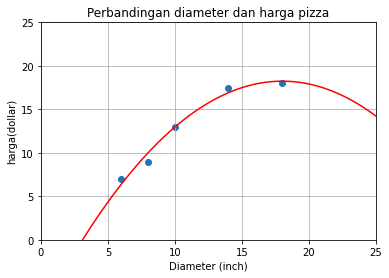

In [19]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan diameter dan harga pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('harga(dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

## Polynomial Regression: quadratic vs cubic

In [ ]:
# Training set
plt.scatter(X_train, y_train)

